### In this we are going to classifiy if the given news is fake or real

Fake news classifier is widly used for many reasons and it is quite easy to implement as well

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer
import nltk

In [2]:
data=pd.read_csv('Fake news Classifier/train.csv',index_col='id')

In [3]:
data.head(10)

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0


In [4]:
data=data.dropna()

In [5]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [6]:
x.shape

(18285, 3)

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.text import one_hot
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences

In [11]:
voc_size=5000

In [12]:
mes=x.copy()

In [13]:
mes.reset_index(inplace=True)

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import regex as re

In [17]:
corpus=[]
for i in range(0,len(mes)):
    reviews=re.sub('[^a-zA-Z]'," ",mes.title[i])
    reviews=reviews.lower()
    reviews=reviews.split()
    reviews=[WordNetLemmatizer().lemmatize(word) for word in reviews if word not in (stopwords.words('english'))]
    corpus.append(" ".join(reviews))

In [18]:
corpus

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'beno hamon win french socialist party presidential nomination new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government troll social medium blog forum website',
 'major league soccer argentine find home success new york time',
 'well fargo chief abruptly step new york time',
 'anonymous donor pay 

In [109]:
onehot_rep=[one_hot(word,voc_size) for word in corpus ]

In [110]:
one_hotrep

[[1687, 3237, 867, 3697, 1628, 63, 1389, 484, 1224, 2641],
 [4851, 994, 3356, 1428, 668, 3979, 1328],
 [4855, 4086, 60, 2403],
 [3014, 567, 622, 4537, 3361, 3252],
 [3616, 668, 3757, 4299, 1394, 1317, 668, 412, 4046, 2497],
 [3158,
  4486,
  3779,
  3827,
  1315,
  2403,
  898,
  817,
  544,
  3401,
  3446,
  2645,
  489,
  204,
  1328],
 [295, 2076, 2488, 3375, 1367, 2267, 4753, 3641, 1108, 3754, 569],
 [728, 2618, 3717, 2847, 3483, 42, 2403, 2665, 1108, 3754, 569],
 [1249, 2859, 2816, 2208, 4865, 944, 2188, 2186, 2403, 3387],
 [1401, 357, 4478, 4875, 767, 4031, 1828, 1149],
 [3810, 3871, 1114, 2125, 1885, 3796, 4309, 277, 4405, 3109, 3999],
 [4537, 1094, 1628, 2399, 2403, 3483],
 [159, 3557, 1033, 1746, 4035, 1999, 18, 4844, 4031],
 [3504, 3590, 794, 406, 4013, 852, 1582, 1108, 3754, 569],
 [3034, 4375, 2555, 4604, 3649, 1108, 3754, 569],
 [3249, 4524, 3666, 3020, 1804, 1948, 563, 2773, 4032, 3445],
 [2657, 73, 994],
 [1724, 3588, 911, 3577, 2403, 1806, 194, 1328],
 [149, 1971, 3356,

In [27]:
max(len(one_array) for one_array in one_hotrep)#meaning the len of the sentence was 47 the max one...this is useful for embedding

47

Here we wont be taking 47 as the padding because we are anyways creating a sparse matrix and if 47 is the padding then the curse of dimensionality might kick in so its better to take 24(just a number I thought will be okay for this) as the padding

In [111]:
sent_length=20
embedded_docs=pad_sequences(onehot_rep,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  484 1224 2641]
 [   0    0    0 ...  668 3979 1328]
 [   0    0    0 ... 4086   60 2403]
 ...
 [   0    0    0 ... 1108 3754  569]
 [   0    0    0 ... 3186 2175  347]
 [   0    0    0 ... 4835 4070 3507]]


In [39]:
embedded_sen.shape

(18285, 20)

In [40]:
embedded_sen[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1687,
       3237,  867, 3697, 1628,   63, 1389,  484, 1224, 2641])

In [112]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())
#Embedding:The first argument is the number of distinct words in the training set. 
#The second argument  indicates the size of the embedding vectors. [1.0,2.0,3.0] so 3 is embedding size herewe have 40
#The input_length argumet, of course, determines the size of each input sequence.

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 20, 40)            200000    
_________________________________________________________________
lstm_10 (LSTM)               (None, 100)               56400     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [113]:
len(embedded_docs),y.shape

(18285, (18285,))

In [114]:
import numpy as np
X_final=np.array(embedded_sen)
y_final=np.array(y)

In [115]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

### Model Training

In [117]:
history=model.fit(X_train,y_train,epochs=10,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/10
192/192 [==============================] - 5s 16ms/step - loss: 0.3512 - accuracy: 0.8264 - val_loss: 0.1970 - val_accuracy: 0.9162
Epoch 2/10
192/192 [==============================] - 3s 14ms/step - loss: 0.1375 - accuracy: 0.9473 - val_loss: 0.2051 - val_accuracy: 0.9231
Epoch 3/10
192/192 [==============================] - 3s 14ms/step - loss: 0.0861 - accuracy: 0.9696 - val_loss: 0.2247 - val_accuracy: 0.9125
Epoch 4/10
192/192 [==============================] - 3s 14ms/step - loss: 0.0540 - accuracy: 0.9819 - val_loss: 0.2778 - val_accuracy: 0.9105
Epoch 5/10
192/192 [==============================] - 3s 14ms/step - loss: 0.0327 - accuracy: 0.9899 - val_loss: 0.3818 - val_accuracy: 0.9175
Epoch 6/10
192/192 [==============================] - 3s 14ms/step - loss: 0.0204 - accuracy: 0.9938 - val_loss: 0.3959 - val_accuracy: 0.9079
Epoch 7/10
192/192 [==============================] - 3s 14ms/step - loss: 0.0095 - accuracy: 0.9975 - val_loss: 0.4337 - val_accuracy: 0.9069

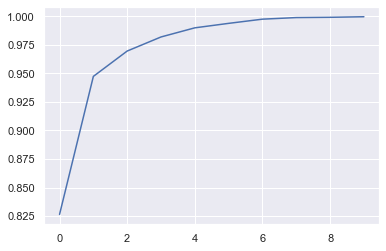

In [118]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

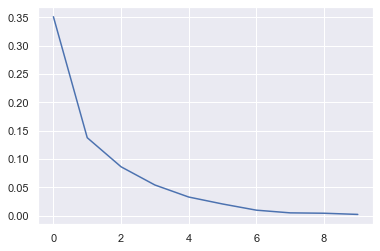

In [119]:
plt.plot(history.history['loss'])

In [138]:
y_pred=model.predict(X_test)

In [139]:
y_pred=np.where(y_pred > 0.5,1,0)

In [98]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [99]:
import seaborn as sb

In [140]:
y_pred

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [141]:
y_pred.shape

(6035, 1)

0.9098591549295775


<AxesSubplot:>

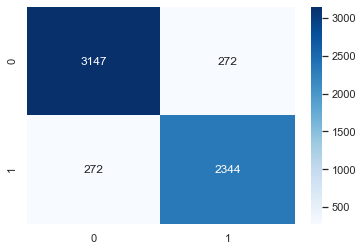

In [145]:
print((accuracy_score(y_test,y_pred)))
sb.heatmap(confusion_matrix(y_test,y_pred),fmt='d',cmap='Blues',annot=True)

In [146]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3419
           1       0.90      0.90      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



#### So this is good we got a fair accuracy of almost 91%